# 2.1 ANALISI DELLA RETE: *NETWORK CHARACTERIZATION*

In questa sezione si analizzano le seguenti caratteristiche della rete creata precedentemente
1. [Informazioni di base](#info)
2. [Componenti connesse](#comps)
3. [Degree Distribution](#dd)
4. [Analisi dei path](#path)
5. [Analisi degli hubs](#hubs)
6. [Clustering Coefficient, densità](#cc)
7. [Centralità](#centralita)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import seaborn as sns
import matplotlib.colors as mcolors
import pickle

warnings.filterwarnings('ignore')

from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
df = pd.read_csv("data/df_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
del df['Unnamed: 0']
df

,source,id_source,target,id_target,weights
0,jwl2nd,4563241355,chanleycourttv,4730732546,1.000000
1,simplyslj,1518917881119059968,theemilydbaker,22594853,0.952055
2,jwl2nd,4563241355,courttv,1031946753510203392,0.924658
3,simplyslj,1518917881119059968,legalbytesmedia,1262475778631106560,0.914384
4,adrferg,1074757149748854792,courttv,1031946753510203392,0.633562
...,...,...,...,...,...
21691,intheone9,208950166,Snicker_n_smile,1528112917723291648,0.000000
21692,intheone9,208950166,ThatUmbrella,901030183213445125,0.000000
21693,intheone9,208950166,dailymailuk,111556423,0.000000
21694,intheone9,208950166,elainebhoft,1380604861486665730,0.000000


Carico la rete reale (**g**) stabilendo la *source*, il *target* e l'attributo delle edges, nel nostro caso i pesi

In [94]:
g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph()) #edge_attr = "weights"
nx.info(g) 

'MultiDiGraph with 18258 nodes and 21696 edges'

In [93]:
g2 = nx.Graph(g) # trasformo il grafo da multigrafo a grafo semplice indiretto
nx.info(g2) 

'Graph with 18258 nodes and 21680 edges'

## Informazioni di base <a id = 'info'> </a>

In [9]:
#funzione che stampa le informazioni di base delle reti (num nodi, edges, lmax ecc.)
def net_basic_info(g):
    nodes = g.number_of_nodes()
    edges = g.number_of_edges()
    directness = g.is_directed()
    self_loops = nx.number_of_selfloops(g)
    lMax = ((nodes) * (nodes - 1)) / 2
    AvgDegree = sum(dict(g.degree()).values())/float(len(g))

    print('- Numero Nodi:', nodes)
    print('- Numero Edges:', edges)
    print ("- Numero di self-loop: ", self_loops)
    print("- La rete e' diretta:",directness)
    print('- Numero massimo di collegamenti (L_max):', lMax)
    print('- Avarage Degree:', AvgDegree)


In [10]:
print("Caratteristiche Real World Netowrk (RETE REALE)\n ")
net_basic_info(g)


Caratteristiche Real World Netowrk (RETE REALE)
 
- Numero Nodi: 18258
- Numero Edges: 21696
- Numero di self-loop:  40
- La rete e' diretta: True
- Numero massimo di collegamenti (L_max): 166668153.0
- Avarage Degree: 2.37660203746303


## HUBS <a id = 'hubs'> </a>
Ricerco all'interno della rete gli **Hubs**

In [25]:
def find_hubs(g, t_degree):
    hubs = []
    noHubs = []
    for i in g: #scorro i nodi in g
        if g.degree(i) >=  t_degree: 
            #se il grado di quella rete è superiorie al grado soglia (t_degree) lo aggiunto alla lista degli hubs
            hubs.append(i)
        else: # altrimenti li aggiungo alla lista degli altri nodi
            noHubs.append(i)
    #infine, stampo il num di hubs identificati    
    print("Numero di hubs nella rete: ", len(hubs), '\n')
    
    return hubs, noHubs

Estraggo gli hubs con la funzione find_hub e ricerco l'hub maggiore (quello con grado più alto)

In [53]:
print('-----------------\n HUBS DELLA RETE \n-----------------\n')

hubs, noHubs = find_hubs(g, 60)  #impostando come soglia un grado pari a 60 ottendo 40 hubs

largest_hub, degree = sorted(g.degree(), key=itemgetter(1))[-1] #ricerco l'hub maggiore
print('Hub maggiore:', largest_hub , 'con', degree, 'collegamenti\n')
for i in hubs:
    sorted(hubs)
    print('*', i, ' - grado:', g.degree(i)) 


-----------------
 HUBS DELLA RETE 
-----------------

Numero di hubs nella rete:  40 

Hub maggiore: deppheardtruth con 548 collegamenti

* theemilydbaker  - grado: 370
* courttv  - grado: 205
* legalbytesmedia  - grado: 183
* youtube  - grado: 498
* queenofcodebass  - grado: 66
* rekietalaw  - grado: 130
* thatumbrella  - grado: 294
* GellertDepp  - grado: 145
* TheEmilyDBaker  - grado: 107
* realamberheard  - grado: 413
* deppheardtruth  - grado: 548
* tmz  - grado: 247
* ThatUmbrella  - grado: 172
* kyduiguy  - grado: 223
* lawcrimenetwork  - grado: 91
* DrProudman  - grado: 107
* reenie62  - grado: 133
* ianrunkle  - grado: 173
* mensurvivetoo  - grado: 69
* KyDUIGuy  - grado: 85
* ThatBrianFella  - grado: 78
* robert__leonard  - grado: 278
* thirdgirlll  - grado: 72
* voguemagazine  - grado: 115
* jamesfromcourt  - grado: 112
* elonmusk  - grado: 261
* CourtTV  - grado: 117
* andysignore  - grado: 108
* eve_barlow  - grado: 118
* disney  - grado: 66
* nypost  - grado: 159
* lumbe

### EGO NETWORK: rete in cui al centro di trova il nodo con più 

---

## Componenti Connesse <a id = 'comps'> </a>

In [108]:
#per calcolare le componenti connesse è necessario trasformare la rete  da diretta a indiretta
comps_g = list(nx.connected_components(g.to_undirected()))  
print ("- Componenti connesse RETE REALE:", len(comps_g))

big_comp_g = len(comps_g[0])
print ('- Componente maaggiore:', big_comp_g)


- Componenti connesse RETE REALE: 2411
- Componente maaggiore: 11980


La rete con più componenti connesse è la rete random (ER)

### Componenti debolmente e fortemente connesse

In [100]:
scc_g = nx.number_strongly_connected_components(g)
wcc_g = nx.number_weakly_connected_components(g)

In [101]:
print ("- Componenti FORTEMENTE CONNESSE rete reale:", scc_g)
print ("- Componenti DEBOLMENTE CONNESSE rete reale:", wcc_g)

- Componenti FORTEMENTE CONNESSE rete reale: 18246
- Componenti DEBOLMENTE CONNESSE rete reale: 2411


****

*****

## Clustering Coefficient e Densità <a id = 'comps'> </a>

In [109]:
#passo g2 perché per calcolare il clustering coeff è necessario avere un grafo semplice e non un multigrafo
ordine_cc_g = [(k, v) for k, v in sorted(cc.items(), key=lambda item: -item[1])]
cc = nx.clustering(g2) 
ordine_cc_g[0:10]

[('jacxpearl', 1.0),
 ('goblinqchesh', 1.0),
 ('ihaveadream0101', 1.0),
 ('KevinRashidi', 1.0),
 ('courttvfans', 1.0),
 ('amypolacko', 1.0),
 ('ssolorio77', 1.0),
 ('robbloodysaul', 1.0),
 ('chrisablesfool', 1.0),
 ('blaw', 1.0)]

In [111]:
#passo g2 perché per calcolare il numero di triangoli è necessario avere un grafo semplice e non un multigrafo
triangoli = nx.triangles(g2)
ordine_triangoli_g = [(k, v) for k, v in sorted(triangoli.items(), key=lambda item: -item[1])]
ordine_triangoli_g[0:10]

[('deppheardtruth', 116),
 ('lawyerschiff', 60),
 ('courttv', 59),
 ('andysignore', 59),
 ('ianrunkle', 45),
 ('laurabockov', 42),
 ('thatbrianfella', 40),
 ('youtube', 35),
 ('chanleycourttv', 30),
 ('ashleycourttv', 29)]

In [104]:
print("AVG CLUSTERING COFFICIENT E DENSITA RETE REALE")
print ("- Densita':", nx.density(g),
       "\n- Average Clustering Coeff: ", nx.average_clustering(g2)) #passo all'avg clusteing g2, ossia il grafo semplice 

AVG CLUSTERING COFFICIENT E DENSITA RETE REALE
- Densita': 6.508741955039246e-05 
- Average Clustering Coeff:  0.00878915165065494


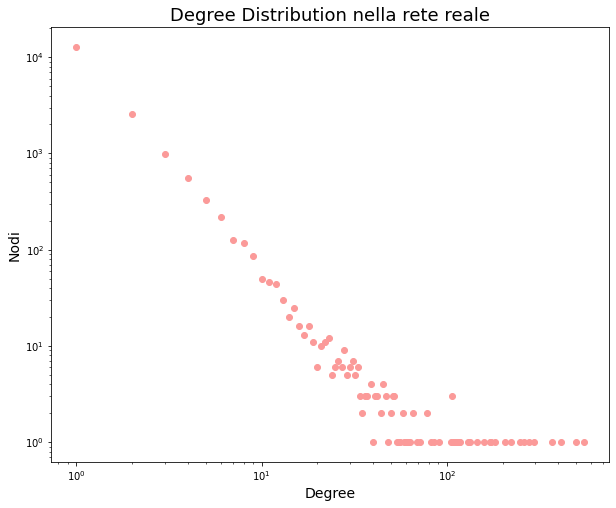

In [105]:
hist_g = nx.degree_histogram(g)

fig = plt.figure(figsize=(10, 8)) 
plt.plot(range(0, len(hist_g)), hist_g, "o", color = '#fb9a99')
plt.title("Degree Distribution nella rete reale", fontsize = 18)
plt.xlabel("Degree", fontsize = 14)
plt.ylabel("Nodi", fontsize = 14)
plt.loglog()
plt.savefig('img/degree_dist_rete_reale.png')

plt.show()

**CCDF** (complementary cumulative distribution function/funzione di distribuzione cumulativa complementare): un metodo di calcolo statistico che misura la potenza nel tempo(?)


**CDF** (comulative distribuzion fraction) [https://en.wikipedia.org/wiki/Cumulative_distribution_function]

In [106]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    #plt.title('Distribution', fontsize = 20)
    
    fig = plt.figure(figsize=(16, 6)) 
    
    
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.', hist_g, "o", color = 'g')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.title('Degree Distibution', fontsize = 16)
    plt.xlabel('Degree', fontsize = 14)
    plt.ylabel('P(k)', fontsize = 14)


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf(color = 'g' )
    plt.title("Comulative Degree Fraction", fontsize = 16)
    plt.xlabel("Degree", fontsize = 14)
    plt.ylabel('CDF', fontsize = 14)

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='-',label='fit ccdf')
    fit.plot_ccdf(color = 'g')
    plt.title("Complementary Comulative Degree Fraction", fontsize = 16)
    plt.ylabel('CCDF', fontsize = 14)
    plt.xlabel('Degree', fontsize = 14)
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

Calculating best minimal value for power law fit


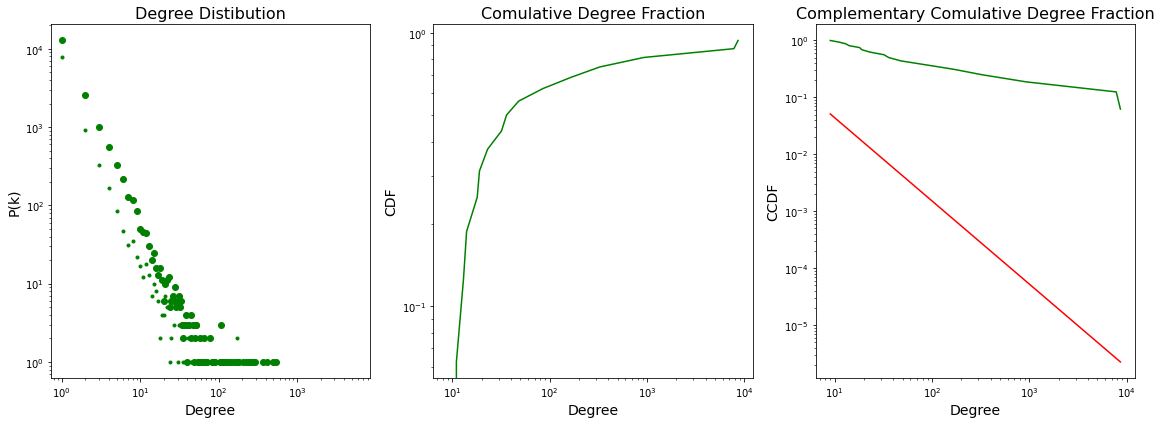

alpha=2.460630695621222 sigma=0.11515767390530551


In [107]:
plot_dist(g)

----

## Path Analysis <a id = 'path'> </a>

In [26]:
#creo dei samples per ciascuna rete così da ridurre i tempi die esecuzione 

In [27]:
print("Average shortest path (g):", nx.average_shortest_path_length(g.subgraph(comps_g[0])))
print("Average shortest path weighted (g):", nx.average_shortest_path_length(g.subgraph(comps_g[0]), weight='weight'))

Average shortest path (g): 0.000297974322856682
Average shortest path weighted (g): 0.000297974322856682


----

## Centralità <a id = 'centralita'> </a>

Di seguito verranno calcolare sulla rete le le seguenti **misure di centralità** e ordinate in base all'importante (solitamente i 10 nodi con centralità maggiore)
1. [Degree Centrality](#dc)
2. [Closeness Centrality](#clc)
3. [Betweenness Centrality](#bc)
4. [Harmonic Centrality](#hc)
5. [Eigenvector Centrality](#ec) 
6. [Page Rank](#pr)


 ### Degree Centrality <a id="dc"></a>

Creo un dizionario con i gradi dei nodi del dizionario e stampo i 10 nodi con grado maggiore

In [88]:
#Creo un dizionario con i gradi
degrees_g = dict(g.degree())

In [89]:
ordine_gradi_g = [(k, v) for k, v in sorted(degrees_g.items(), key=lambda item: -item[1])]
ordine_gradi_g[0:10]

[('deppheardtruth', 548),
 ('youtube', 498),
 ('realamberheard', 413),
 ('theemilydbaker', 370),
 ('thatumbrella', 294),
 ('robert__leonard', 278),
 ('elonmusk', 261),
 ('tmz', 247),
 ('kyduiguy', 223),
 ('courttv', 205)]

### Closeness Centrality  <a id="clc"></a>

In [30]:
cc_g = nx.closeness_centrality(g)

In [31]:
ordine_cc_g = [(k, v) for k, v in sorted(cc_g.items(), key=lambda item: -item[1])]
ordine_cc_g[0:10]

[('youtube', 0.029174843017045052),
 ('elonmusk', 0.02212246545396428),
 ('realamberheard', 0.021961668812387744),
 ('theemilydbaker', 0.019921747072327106),
 ('thatumbrella', 0.01684469890553749),
 ('tmz', 0.015274389135295302),
 ('twitter', 0.013261448174909263),
 ('kyduiguy', 0.012405548535946729),
 ('courttv', 0.01132509811424169),
 ('anoushasakoui', 0.010903044213026401)]

### Betweenness Centrality <a id="bc"></a>

In [32]:
bc_g = nx.closeness_centrality(g)

In [33]:
ordine_bc_g = [(k, v) for k, v in sorted(bc_g.items(), key=lambda item: -item[1])]
ordine_bc_g[0:10]

[('youtube', 0.029174843017045052),
 ('elonmusk', 0.02212246545396428),
 ('realamberheard', 0.021961668812387744),
 ('theemilydbaker', 0.019921747072327106),
 ('thatumbrella', 0.01684469890553749),
 ('tmz', 0.015274389135295302),
 ('twitter', 0.013261448174909263),
 ('kyduiguy', 0.012405548535946729),
 ('courttv', 0.01132509811424169),
 ('anoushasakoui', 0.010903044213026401)]

### Harmonic Centrality <a id="hc"></a>

In [34]:
hc_g = nx.harmonic_centrality(g)

In [35]:
ordine_hc_g = [(k, v) for k, v in sorted(hc_g.items(), key=lambda item: -item[1])]
ordine_hc_g[0:10]

[('youtube', 652.1166666666664),
 ('elonmusk', 469.0166666666665),
 ('realamberheard', 439.0333333333333),
 ('theemilydbaker', 398.70000000000005),
 ('thatumbrella', 350.28333333333336),
 ('tmz', 325.40000000000003),
 ('twitter', 265.13333333333344),
 ('kyduiguy', 248.95000000000002),
 ('courttv', 218.83333333333331),
 ('anoushasakoui', 206.13333333333338)]

## Eigenvector Centrality <a id="ec"></a>

In [36]:
evc_g = nx.eigenvector_centrality(g2)

In [37]:
ordine_evc_g = [(k, v) for k, v in sorted(evc_g.items(), key=lambda item: -item[1])]
ordine_evc_g[0:10]

[('deppheardtruth', 0.43188299832441074),
 ('theemilydbaker', 0.25019176173511587),
 ('youtube', 0.1985930155116337),
 ('thatumbrella', 0.1902511012432535),
 ('ianrunkle', 0.163530656362908),
 ('kyduiguy', 0.15081706239863715),
 ('realamberheard', 0.14912463655989333),
 ('legalbytesmedia', 0.12830720551278485),
 ('lumberlaw', 0.11299442742195255),
 ('tmz', 0.09943237432632798)]

### Page Rank <a id="pr"></a>

In [38]:
pr_g = nx.pagerank(g)

In [39]:
ordine_pr_g = [(k, v) for k, v in sorted(pr_g.items(), key=lambda item: -item[1])]
ordine_pr_g[0:10]

[('youtube', 0.013684129930601143),
 ('realamberheard', 0.00881055986183616),
 ('theemilydbaker', 0.007026955762850357),
 ('lawcrimenetwork', 0.006288955398143012),
 ('elonmusk', 0.006150350780889709),
 ('tmz', 0.004552916720295864),
 ('thatumbrella', 0.004468585002152114),
 ('courttv', 0.003882412678030352),
 ('ashleycourttv', 0.003428799119900106),
 ('nypost', 0.0031553639079998598)]